## 데이터 시각화 - 그래프

### 앤스콤 4분할 그래프 그리기

: 평균, 분산, 상관관계, 회귀선의 통계수치가 같아도 그래프 형태는 다를수 있음.

In [31]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')
print(anscombe)
print(type((anscombe)))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

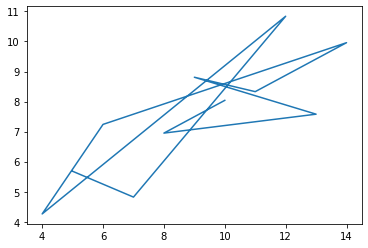

In [8]:
import matplotlib.pyplot as plt

#anscombe 데이터프레임의 dataset 열에서 데이터 값이 I 인것만 추출
dataset_1 = anscombe[anscombe['dataset']== 'I']

plt.plot(dataset_1['x'], dataset_1['y'])

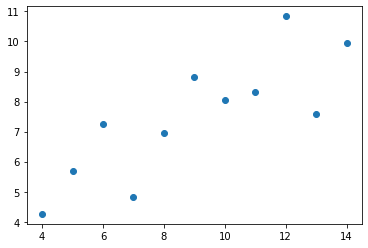

In [9]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

#### matplotlib 라이브러리로 그래프 그리기
    1. 전체 그래프 위치할 기본 틀 figure() 로 생성
    
    2. 그래프를 그려넣을 그래프 격자 만들기 add_subplot(행크기, 열크기)
    
    3. 각 격자마다 그래프 추가

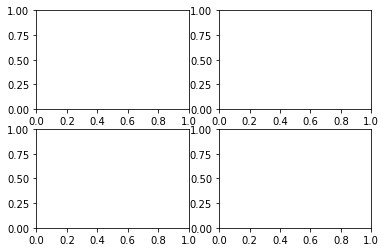

In [14]:
dataset_2 = anscombe[anscombe['dataset']== 'II']
dataset_3 = anscombe[anscombe['dataset']=='III']
dataset_4 = anscombe[anscombe['dataset']=='IV']

fig =plt.figure()

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

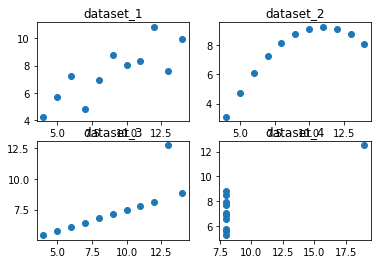

In [17]:
axes1.plot(dataset_1['x'],dataset_1['y'],'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

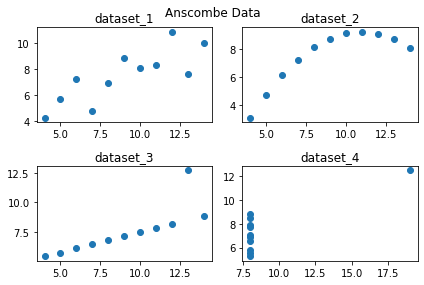

In [21]:
#그래프 별 타이틀 설정
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig.suptitle('Anscombe Data')
fig.tight_layout()
fig

### Matplotlib 라이브러리 활용

In [10]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


#### 히스토그램
    : 데이터 프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용
    
 ##### 일변량 그래프 : 변수를 하나만 사용해서 그린 그래프
    

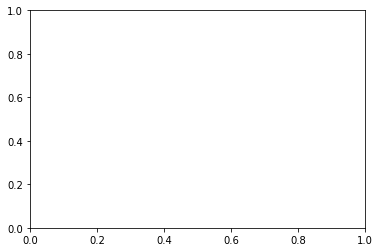

In [11]:
fig= plt.figure()
axes1= fig.add_subplot(1,1,1)

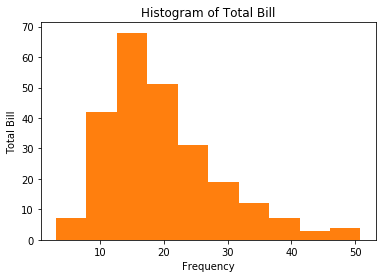

In [13]:
#hist() 함수로 히스토그램 그리기
axes1.hist(tips['total_bill'],bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

In [14]:
#scatter_plot() 함수로 산점도 그래프 그리기
# 산점도 그래프는 변수 2개를 사용 -> '이변량 그래프'

Text(0, 0.5, 'Tip')

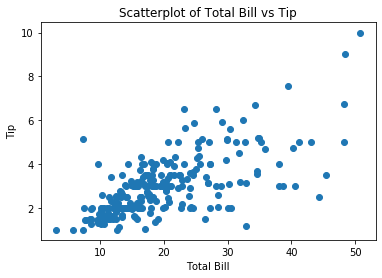

In [18]:
scatter_plot = plt.figure()
axes1= scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip' )
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

In [ ]:
# boxplot() : 박스 그래프로 이산형 변수, 연속형 변수 함께 다루기

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

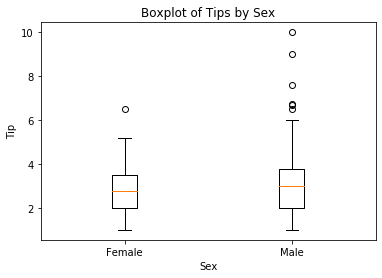

In [20]:
boxplot = plt.figure()

axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'], tips[tips['sex']=='Male']['tip']], labels=['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

#### 다변량 그래프 그리기

In [21]:
#성별 산점도 그래프에 추가
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else : 
        return 1

In [22]:
tips['sex_color']=tips['sex'].apply(recode_sex)

Text(0, 0.5, 'Tip')

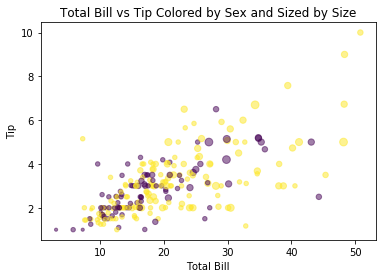

In [25]:
scatter_plot = plt.figure()
axes1= scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size']*10,
    c = tips['sex_color'],
    alpha = 0.5
)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

###  Seaborn 라이브러리

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

NameError: name 'set_title' is not defined

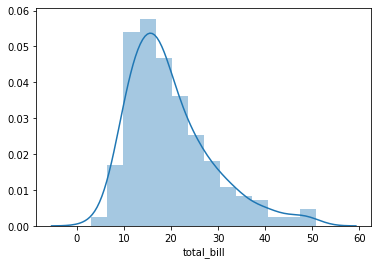

In [6]:
# displot( ) : 히스토그램과 밀집도 그래프 같이 그림 (인자: kde, hist)
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax = set_title('Total Bill Histogram with Density Plot')

Text(0.5, 0, 'Total Bill')

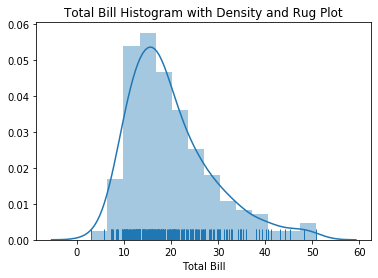

In [8]:
#displot - rug : 그래프의 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도를 표현
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

##### countplot() 그래프

Text(0, 0.5, 'Frequency')

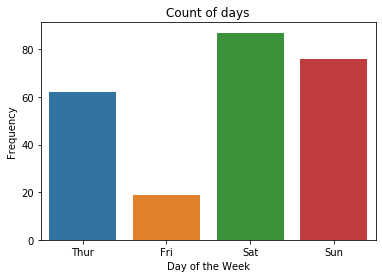

In [10]:
ax = plt.subplots()
ax = sns.countplot('day',data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

#### Seaborn 라이브러리로 산점도 그래프 그리기

##### regplot() : seaborn 라이브러리에서 산점도 그래프 그리는 함수, 회귀선도 가능(fit_reg)

Text(0, 0.5, 'Tip')

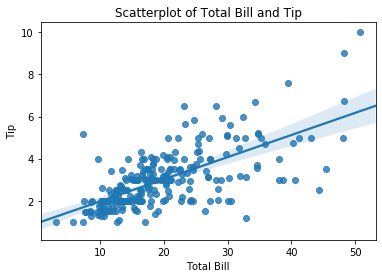

In [12]:
ax = plt.subplot()
ax = sns.regplot(x='total_bill', y='tip',data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

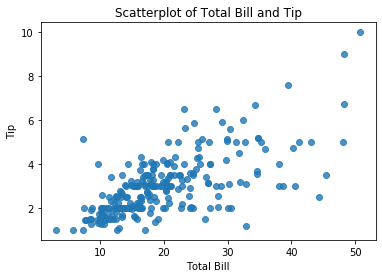

In [13]:
#회귀선 제거
ax = plt.subplot()
ax = sns.regplot(x='total_bill', y='tip',data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

##### jointplot(): 산점도와 히스토그램을 한번에 그려주는 메서드 

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

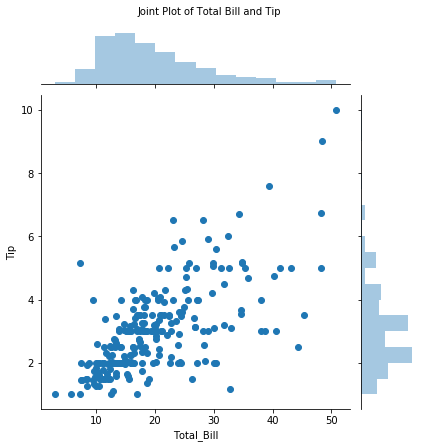

In [14]:
joint = sns.jointplot(x='total_bill', y='tip',data=tips)
joint.set_axis_labels(xlabel='Total_Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

##### hexbin : 산점도 그래프의 데이터를 쉽게 구분하기 위해 데이터를 육각형으로 그린 그래프

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

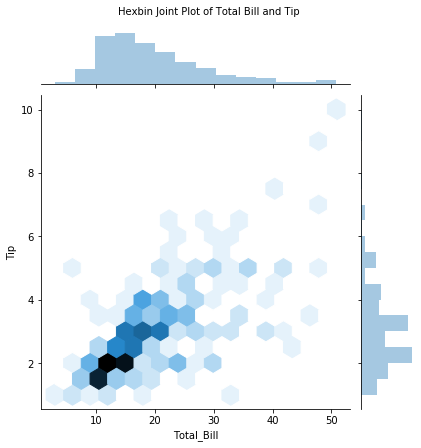

In [18]:
hexbin = sns.jointplot(x='total_bill',y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total_Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

##### 이차원 밀집도 kdeplot() 

Text(0, 0.5, 'Tip')

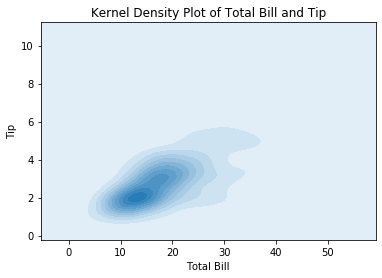

In [19]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'],shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

##### 바 그래프 barplot() : 지정한 변수의 평균을 계산

Text(0, 0.5, 'Average total bill')

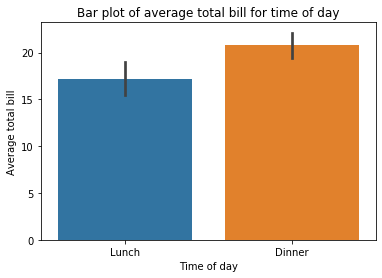

In [20]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

##### 박스 그래프 boxplot()
    : 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 통계량 표현

Text(0, 0.5, 'Total Bill')

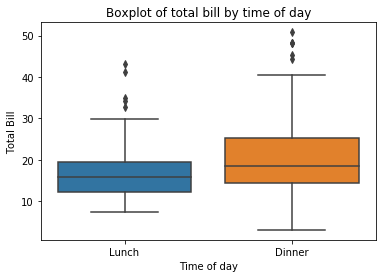

In [21]:
ax = plt.subplots()
ax = sns.boxplot(x='time',y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

##### violinplot()바이올린 그래프로 데이터 분산 확인

Text(0, 0.5, 'Total Bill')

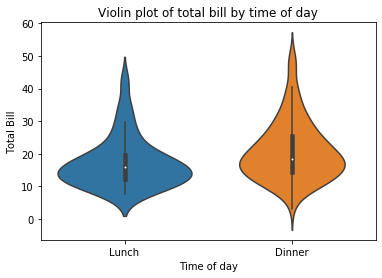

In [22]:
ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

##### pairplot() 관계 그래프 그리기 
    1. map_upper(): 대각선 기준으로 위쪽 그래프 지정
    2. map_lower(): 대각선 기준으로 아래쪽 그래프 지정
    3. map_diag(): 대각선 그래프 지정

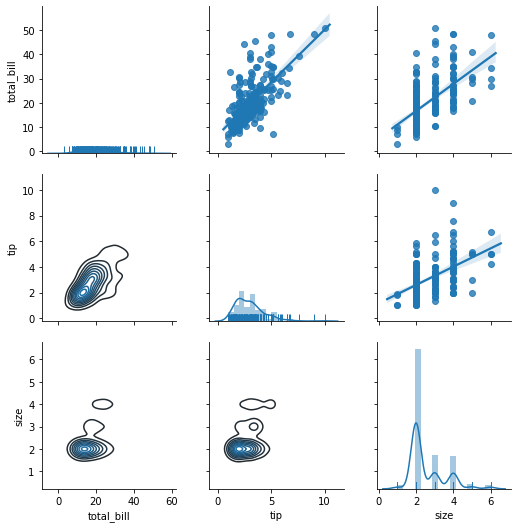

In [25]:
pair_grid = sns.PairGrid(tips)
#대각선 위쪽 : 산점도 그래프
pair_grid = pair_grid.map_upper(sns.regplot)
#대각선 아래쪽 : 히스토그램, 밀집도
pair_grid = pair_grid.map_lower(sns.kdeplot)
#대각선 : 이차원 밀집도
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

##### sns로 다변량 그래프 그리기

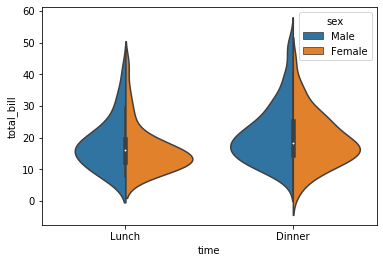

In [27]:
#hue 인자로 색상 추가
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

##### 산점도 그래프 점 크기 - scatter_kws에 딕셔너리 형태로 인자값 전달

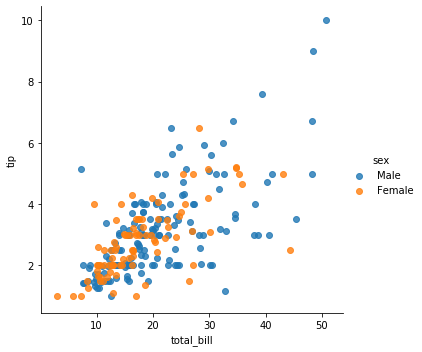

In [28]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

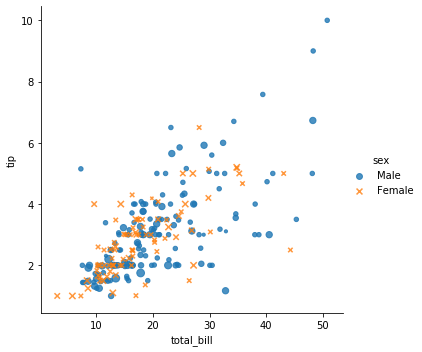

In [29]:
scatter = sns.lmplot(x='total_bill',y='tip',data=tips, fit_reg=False, hue='sex', markers=['o','x'],
                    scatter_kws={'s':tips['size']*10})

##### Implot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기


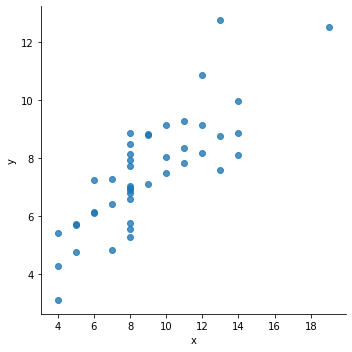

In [32]:
anscombe_plot = sns.lmplot(x='x',y='y', data=anscombe, fit_reg=False)

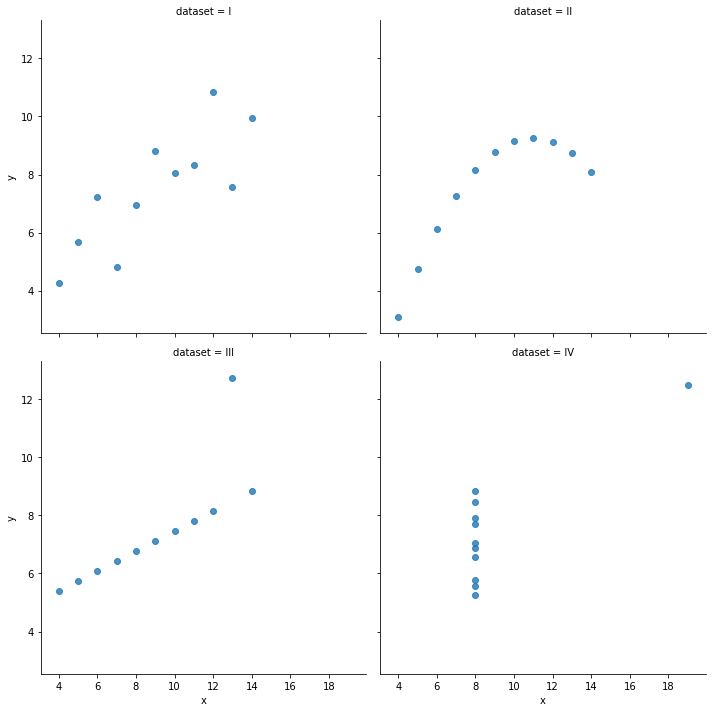

In [33]:
# 그룹별로 그래프 나누기 - col, col_wrap (열 개수) 인자 설정
anscombe_plot = sns.lmplot(x='x',y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

### 데이터 프레입과 시리즈로 그래프 그리기

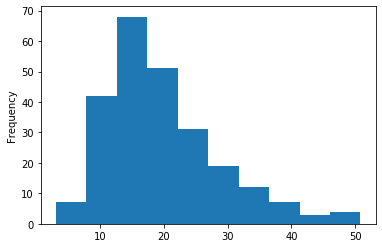

In [34]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

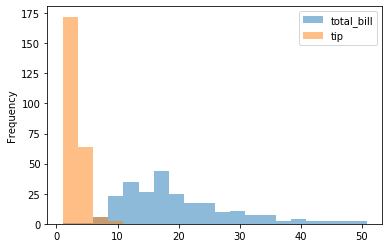

In [35]:
#투명도 조절 - alpha, bins, ax 인자 사용 

fig, ax = plt.subplots()
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

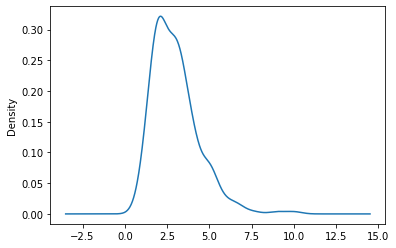

In [36]:
#밀집도 그래프 - plot.kde()
ax = plt.subplots()
ax = tips['tip'].plot.kde()

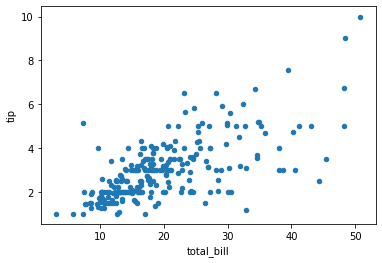

In [38]:
#산점도 그래프 - plot.scatter()
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill',y='tip', ax=ax)

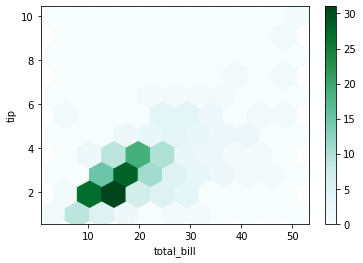

In [41]:
#육각 그래프 - plot.hexbin(), gridsize로 크기 변경
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill',y='tip',gridsize= 10,ax=ax)

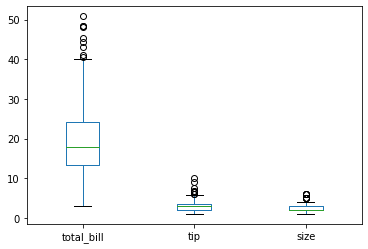

In [42]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

### Seaborn 라이브러리로 그래프 스타일 설정하기

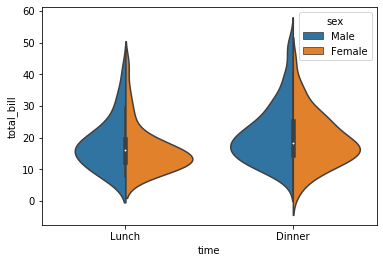

In [43]:
fig, ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data=tips, split=True)

##### set_style() 로 그래프 스타일 설정

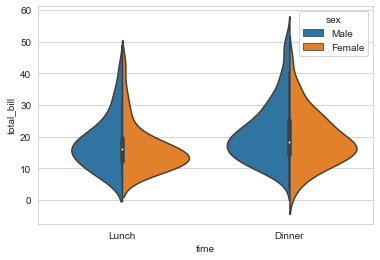

In [45]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data=tips, split=True)

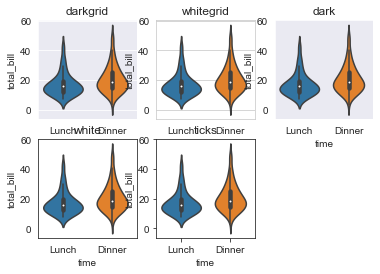

In [46]:
fig = plt.figure()

seaborn_styles = ['darkgrid','whitegrid','dark','white','ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx+1
    with sns.axes_style (style):
        ax = fig.add_subplot(2,3,plot_position)
        violin =  sns.violinplot(x= 'time',y='total_bill', data=tips, ax=ax)
        violin.set_title(style)